In [82]:
import os
import os.path as path
import boto3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_root = os.getcwd()
input_dir = 'input'

log_csv_file_name = 'BGL.csv'
log_csv_file = log_file = path.abspath(path.join(project_root, input_dir, log_csv_file_name))

In [92]:
original_df = pd.read_csv(log_csv_file)
print(original_df.shape)
print(original_df.info())

(1161151, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161151 entries, 0 to 1161150
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Unnamed: 0      1161151 non-null  int64 
 1   Anomaly Type    1161151 non-null  object
 2   Timestamp (ms)  1161151 non-null  int64 
 3   Date            1161151 non-null  object
 4   Node            1161130 non-null  object
 5   Timestamp       1161151 non-null  object
 6   Node Repeat     1161130 non-null  object
 7   Message Type    1153780 non-null  object
 8   Component       1161151 non-null  object
 9   Level           1161151 non-null  object
 10  Content         1161151 non-null  object
 11  Anomaly Label   1161151 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 106.3+ MB
None


In [4]:
original_df.drop(['Timestamp (ms)', 'Node Repeat'], axis = 1)
original_df['Anomaly Label'] = np.where(original_df['Anomaly Type'] == '-', 0, 1)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], format='%Y-%m-%d-%H.%M.%S.%f')

original_df.head(n=20)

,Anomaly Type,Timestamp (ms),Date,Node,Timestamp,Node Repeat,Message Type,Component,Level,Content,Anomaly Label
0,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
5,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.131467,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
6,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.293532,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
7,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.428563,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
8,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.601412,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
9,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.749199,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0


['-' 'APPREAD' 'KERNDTLB' 'KERNMC' 'KERNRTSP' 'KERNSTOR' 'APPCHILD'
 'APPALLOC' 'KERNSOCK' 'MASNORM' 'LINKDISC' 'KERNNOETH' 'KERNTERM'
 'APPUNAV' 'KERNPOW' 'KERNPROG' 'LINKPAP' 'APPBUSY' 'APPTORUS' 'MASABNORM'
 'KERNCON' 'APPSEV' 'MONPOW' 'MONNULL' 'KERNMNT' 'KERNMNTF' 'KERNMICRO'
 'APPRES' 'LINKIAP' 'KERNPAN' 'KERNEXT' 'KERNFLOAT' 'KERNBIT' 'KERNRTSA'
 'MMCS' 'KERNREC' 'KERNSERV' 'MONILL' 'APPTO' 'LINKBLL' 'KERNTLBE'
 'APPOUT']
42
-            4365033
KERNDTLB      152734
KERNSTOR       63491
APPSEV         49651
KERNMNTF       31531
KERNTERM       23338
KERNREC         6145
APPREAD         5983
KERNRTSP        3983
APPRES          2370
APPUNAV         2048
APPTO           1991
KERNMICRO       1503
APPOUT           816
KERNMNT          720
APPBUSY          512
KERNMC           342
APPCHILD         320
KERNSOCK         209
KERNPOW          192
LINKIAP          166
APPALLOC         144
KERNSERV          94
MASABNORM         37
LINKDISC          24
KERNPAN           18
KERNCON           

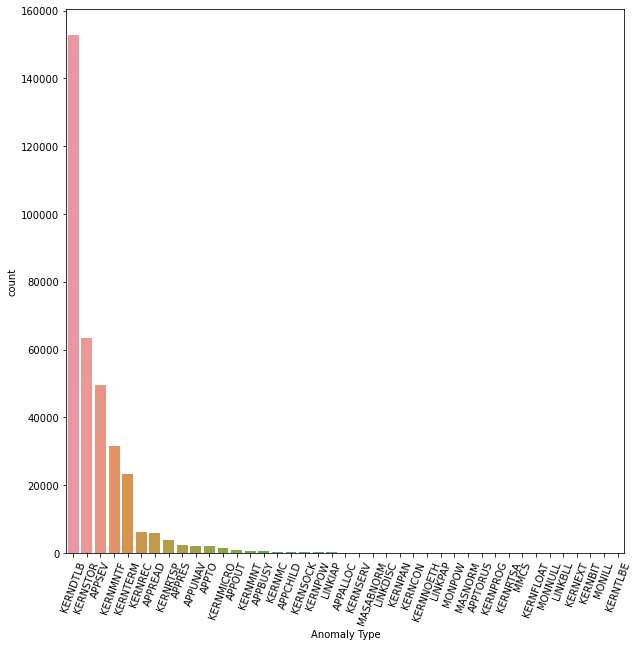

In [5]:
unique_anomaly_type = original_df['Anomaly Type'].unique()
print(unique_anomaly_type)
print(len(unique_anomaly_type))
print(original_df['Anomaly Type'].value_counts())

df_with_anomaly = original_df[original_df['Anomaly Type'] != '-']
anomaly_types = df_with_anomaly['Anomaly Type'].value_counts().index
fig, ax = plt.subplots(figsize=(10, 10))
op = sns.countplot(x='Anomaly Type', data=df_with_anomaly, order=anomaly_types)
op.set_xticklabels(labels = anomaly_types, rotation = 70)
plt.show()

['KERNEL' 'LINKCARD' 'APP' 'MMCS' 'HARDWARE' 'DISCOVERY' 'CMCS'
 'BGLMASTER' 'FATAL' 'MONITOR' 'SERV_NET' 'a' '0' 'iar']
KERNEL       4290181
APP           228536
DISCOVERY      97172
MMCS           88930
HARDWARE        5148
MONITOR         1681
LINKCARD        1170
FATAL            306
CMCS             211
BGLMASTER        145
a                  4
0                  4
SERV_NET           3
iar                2
Name: Component, dtype: int64


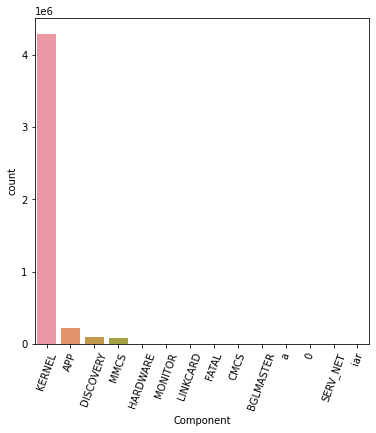

In [6]:
unique_components = original_df['Component'].unique()
print(unique_components)
print(original_df['Component'].value_counts())

component_types = original_df['Component'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Component', data=original_df, order=component_types)
op.set_xticklabels(labels = component_types, rotation = 70)
plt.show()

In [7]:
len(original_df[original_df['Component'].isin(['a', '0', 'iar'])])

10

['INFO' 'FATAL' 'WARNING' 'SEVERE' 'ERROR' 'Kill' 'FAILURE' 'single'
 'microseconds' '0x00544eb8,']
INFO            3701880
FATAL            854658
ERROR            112355
WARNING           23357
SEVERE            19213
FAILURE            1714
Kill                306
single                4
microseconds          4
0x00544eb8,           2
Name: Level, dtype: int64


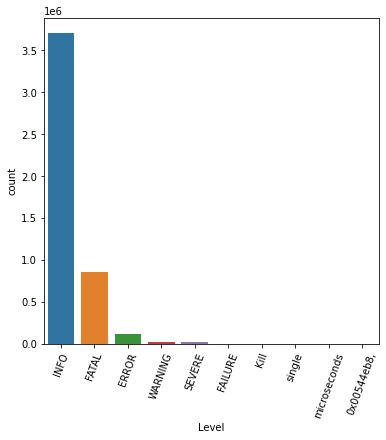

In [8]:
unique_levels = original_df['Level'].unique()
print(unique_levels)
print(original_df['Level'].value_counts())

log_levels = original_df['Level'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Level', data=original_df, order=log_levels)
op.set_xticklabels(labels=log_levels, rotation=70)
plt.show()

In [9]:
len(original_df[original_df['Level'].isin(['single', 'microseconds', '0x00544eb8'])])

8

['RAS' nan 'KERNEL' 'for' 'interrupts,' '(5438708)' '(4211594)']
RAS            4608962
KERNEL             306
for                  4
interrupts,          4
(5438708)            1
(4211594)            1
Name: Message Type, dtype: int64


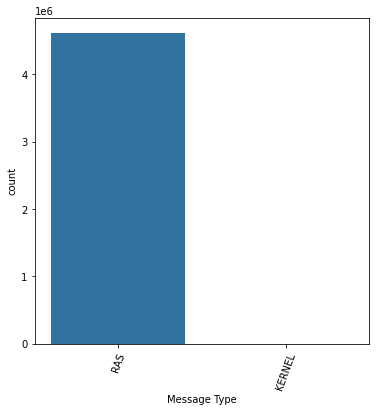

In [10]:
unique_message_types = original_df['Message Type'].unique()
print(unique_message_types)
print(original_df['Message Type'].value_counts())

df_with_msg_type = original_df[original_df['Message Type'].isin(['RAS', 'KERNEL', 'interrupts'])]
message_types = df_with_msg_type['Message Type'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Message Type', data=df_with_msg_type, order=message_types)
op.set_xticklabels(labels=message_types, rotation=70)
plt.show()

In [11]:
len(original_df[original_df['Message Type'].isin(['RAS', 'KERNEL', 'interrupts'])])

4609268

In [12]:
unique_nodes = original_df['Node'].unique()
print(unique_nodes)
print(original_df['Node'].value_counts())

['R02-M1-N0-C:J12-U11' 'R27-M1-L3-U18-C' 'R20-M1-N5-C:J17-U01' ...
 'R35-M1-NB' 'R22-M1' 'R22']
R30-M0-N9-C:J16-U01    152329
R02-M1-N0-C:J12-U11     64650
R37-M1-NC-C:J02-U11     35288
UNKNOWN_LOCATION        27039
R16-M1-N2-C:J17-U01     16921
                        ...  
R46-M0-L0                   1
R41-M0-L1                   1
R46-M0-L1                   1
R46-M1-L1                   1
R42-M1-L1                   1
Name: Node, Length: 69251, dtype: int64


[0 1]
0    4365033
1     348460
Name: Anomaly Label, dtype: int64
7.392818871270203


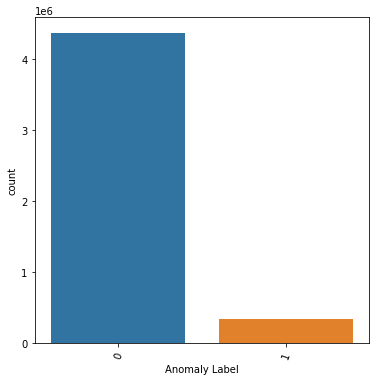

In [13]:
unique_anomaly_labels = original_df['Anomaly Label'].unique()
print(unique_anomaly_labels)
anomaly_distribution = original_df['Anomaly Label'].value_counts()
print(anomaly_distribution)
print(anomaly_distribution[1]/(anomaly_distribution[0]+anomaly_distribution[1])*100)

anomaly_labels = original_df['Anomaly Label'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Anomaly Label', data=original_df, order=anomaly_labels)
op.set_xticklabels(labels=anomaly_labels, rotation=70)
plt.show()

           Anomaly Label
Component               
KERNEL            284344
APP                63845
LINKCARD             206
BGLMASTER             47
MONITOR               15
MMCS                   3
0                      0
CMCS                   0
DISCOVERY              0
FATAL                  0
HARDWARE               0
SERV_NET               0
a                      0
iar                    0


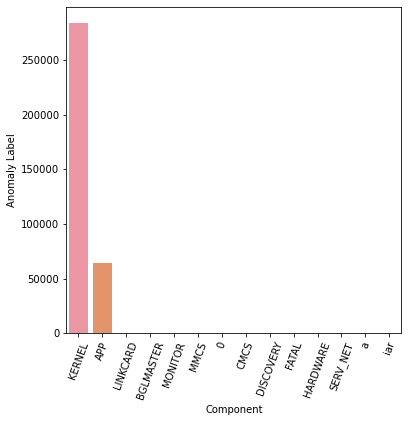

In [26]:
anomalies_by_component = original_df.groupby('Component').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(anomalies_by_component)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=anomalies_by_component.index, y=anomalies_by_component['Anomaly Label'])
op.set_xticklabels(labels=anomalies_by_component.index, rotation=70)
plt.show()

              Anomaly Label
Level                      
FATAL                348398
FAILURE                  62
0x00544eb8,               0
ERROR                     0
INFO                      0
Kill                      0
SEVERE                    0
WARNING                   0
microseconds              0
single                    0


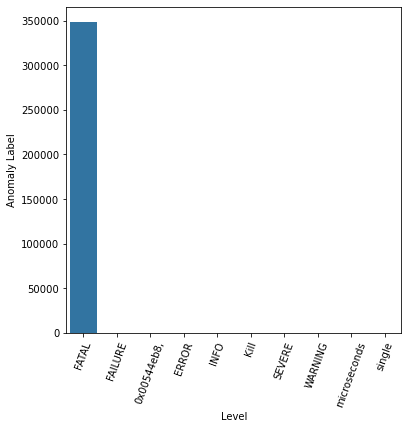

In [27]:
anomalies_by_levels = original_df.groupby('Level').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(anomalies_by_levels)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=anomalies_by_levels.index, y=anomalies_by_levels['Anomaly Label'])
op.set_xticklabels(labels=anomalies_by_levels.index, rotation=70)
plt.show()

In [14]:
print('Start Date: ', min(original_df['Timestamp']))
print('End Date: ', max(original_df['Timestamp']))

Start Date:  2005-06-03 15:42:50.363779
End Date:  2006-01-04 08:00:05.233639


Timestamp
2005-12-31    347987
2006-12-31       473
Freq: A-DEC, Name: Anomaly Label, dtype: int64


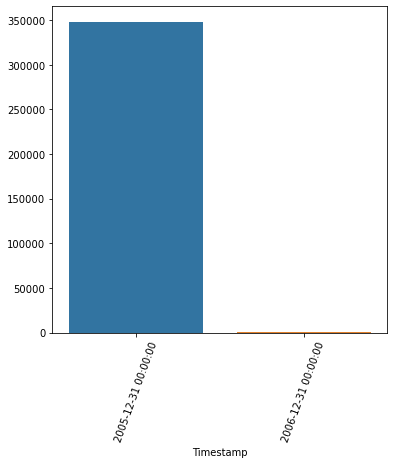

In [15]:
anomaly_over_timestamp = original_df.resample(rule='Y', on='Timestamp')['Anomaly Label'].sum()
print(anomaly_over_timestamp)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x = anomaly_over_timestamp.index, y = anomaly_over_timestamp.values)
op.set_xticklabels(labels=anomaly_over_timestamp.index, rotation=70)
plt.show()

Timestamp
2005-06-30    225153
2005-07-31      6729
2005-08-31     27113
2005-09-30     34742
2005-10-31      8434
2005-11-30     28019
2005-12-31     17797
2006-01-31       473
Freq: M, Name: Anomaly Label, dtype: int64


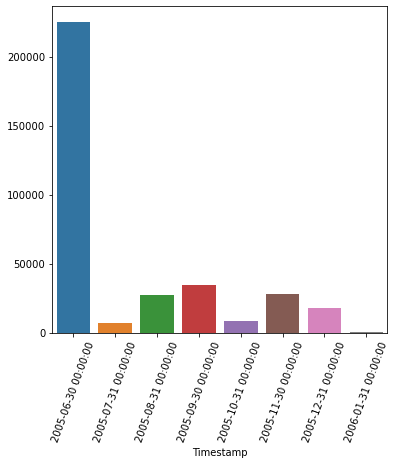

In [16]:
anomaly_over_timestamp = original_df.resample(rule='M', on='Timestamp')['Anomaly Label'].sum()
print(anomaly_over_timestamp)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x = anomaly_over_timestamp.index, y = anomaly_over_timestamp.values)
op.set_xticklabels(labels=anomaly_over_timestamp.index, rotation=70)
plt.show()

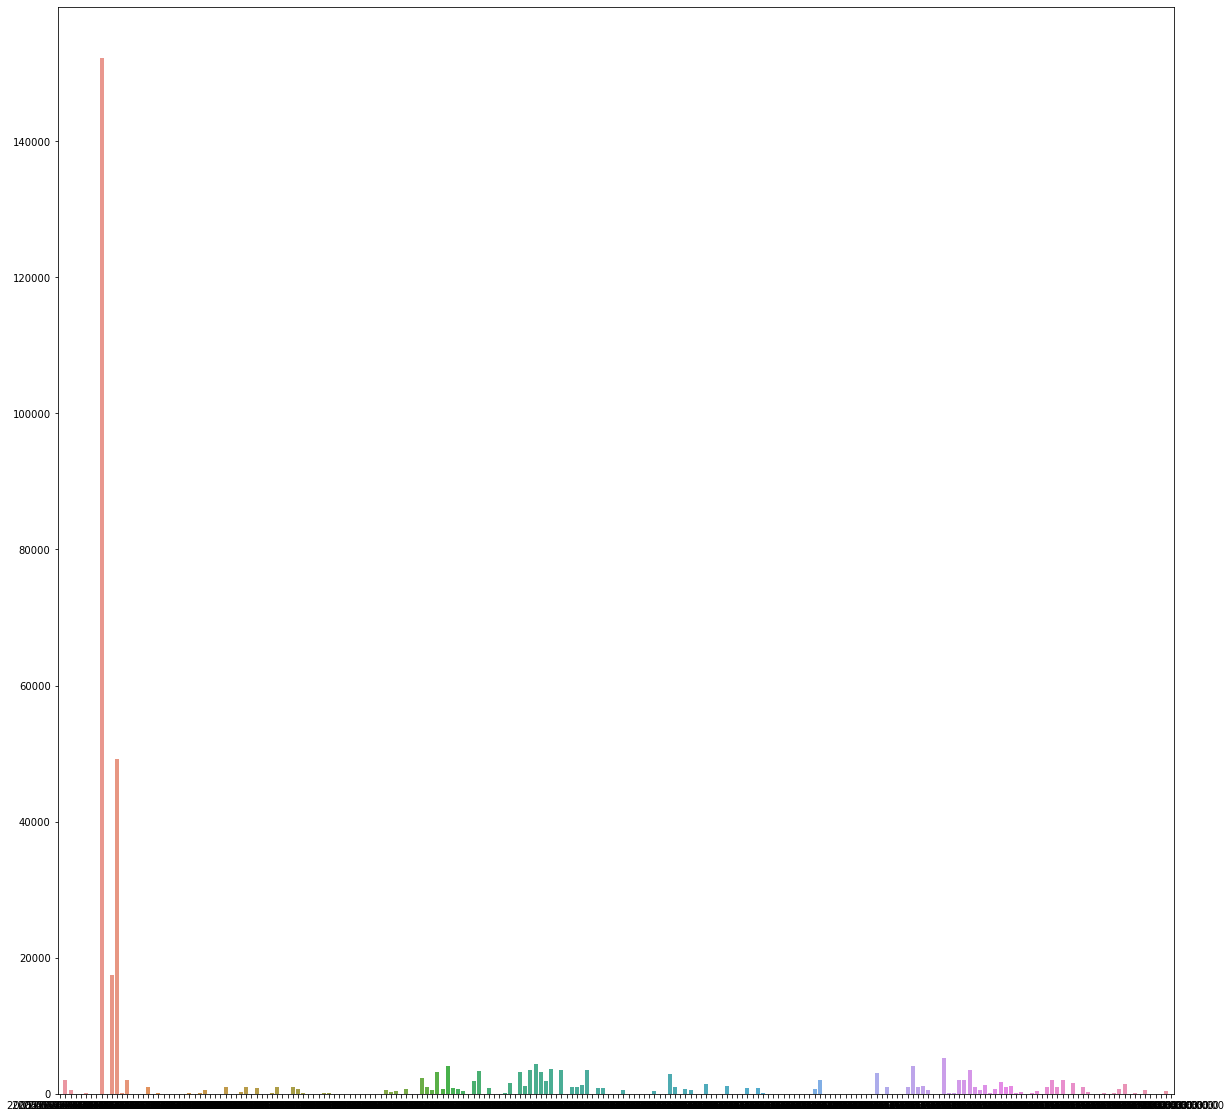

Timestamp
2005-06-11    152183
2005-06-14     49154
2005-06-13     17409
2005-11-21      5301
2005-09-03      4354
               ...  
2005-10-21         0
2005-07-16         0
2005-07-30         0
2005-07-22         0
2005-06-03         0
Name: Anomaly Label, Length: 216, dtype: int64


In [17]:
anomaly_over_timestamp = original_df.resample(rule='D', on='Timestamp')['Anomaly Label'].sum()

fig, ax = plt.subplots(figsize=(20, 20))
op = sns.barplot(x = anomaly_over_timestamp.index, y = anomaly_over_timestamp.values)
op.set(xlabel=None)
plt.show()

print(anomaly_over_timestamp.sort_values(ascending=False))

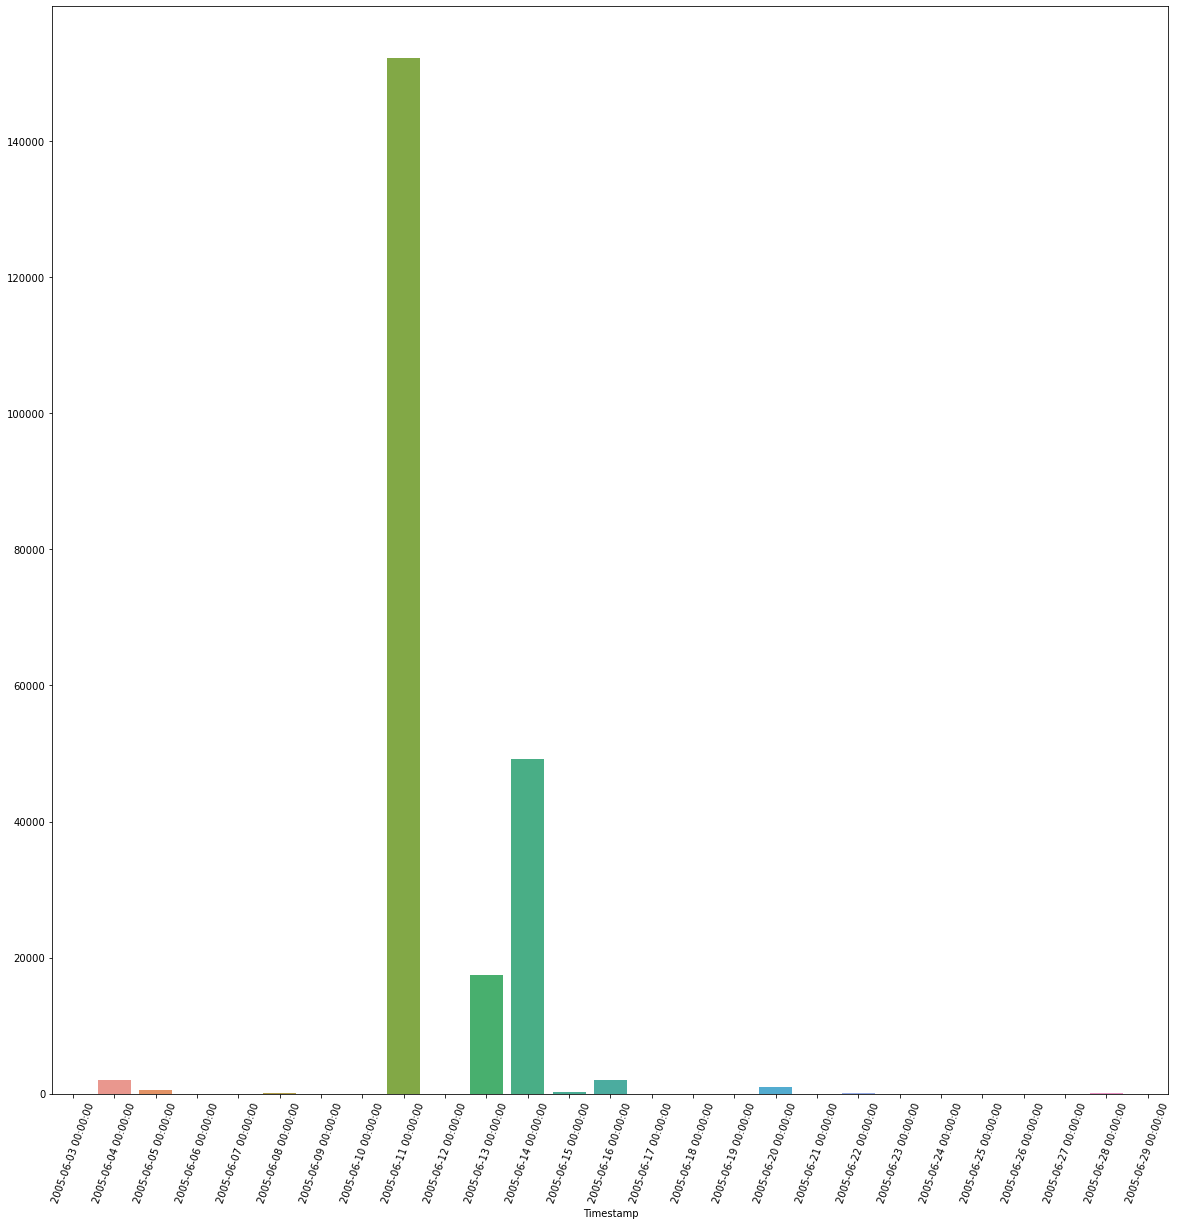

Timestamp
2005-06-11    152183
2005-06-14     49154
2005-06-13     17409
2005-06-16      2043
2005-06-04      2040
2005-06-20      1022
2005-06-05       569
2005-06-15       177
2005-06-08       150
2005-06-22       128
2005-06-28        53
2005-06-23        18
2005-06-07         5
2005-06-06         5
2005-06-09         4
2005-06-17         4
2005-06-21         3
2005-06-18         3
2005-06-29         2
2005-06-19         2
2005-06-10         2
2005-06-26         1
2005-06-12         0
2005-06-24         0
2005-06-25         0
2005-06-27         0
2005-06-03         0
Name: Anomaly Label, dtype: int64


In [18]:
original_df['Date'] = pd.to_datetime(original_df['Date'], format='%Y-%m-%d')
df_200506 = original_df.loc[(original_df['Timestamp'] >= '2005-06-01') & (original_df['Timestamp'] < '2005-06-30')]

df_200506_anomaly_over_timestamp = df_200506.resample(rule='D', on='Timestamp')['Anomaly Label'].sum()

fig, ax = plt.subplots(figsize=(20, 20))
op = sns.barplot(x = df_200506_anomaly_over_timestamp.index, y = df_200506_anomaly_over_timestamp.values)
op.set_xticklabels(labels=df_200506_anomaly_over_timestamp.index, rotation=70)
plt.show()

print(df_200506_anomaly_over_timestamp.sort_values(ascending=False))

In [91]:
print(df_200506.shape)
df_200506.info()

(1161151, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161151 entries, 0 to 1161150
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Anomaly Type    1161151 non-null  object        
 1   Timestamp (ms)  1161151 non-null  int64         
 2   Date            1161151 non-null  datetime64[ns]
 3   Node            1161130 non-null  object        
 4   Timestamp       1161151 non-null  datetime64[ns]
 5   Node Repeat     1161130 non-null  object        
 6   Message Type    1153780 non-null  object        
 7   Component       1161151 non-null  object        
 8   Level           1161151 non-null  object        
 9   Content         1161151 non-null  object        
 10  Anomaly Label   1161151 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 138.6+ MB


[0 1]
0    936174
1    224977
Name: Anomaly Label, dtype: int64
19.37534394751415


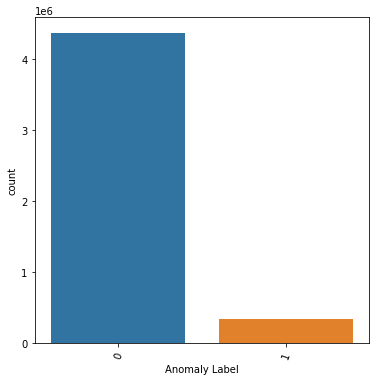

In [19]:
df_200506_unique_anomaly_labels = df_200506['Anomaly Label'].unique()
print(df_200506_unique_anomaly_labels)
df_200506_anomaly_distribution = df_200506['Anomaly Label'].value_counts()
print(df_200506_anomaly_distribution)
print(df_200506_anomaly_distribution[1]/(df_200506_anomaly_distribution[0]+df_200506_anomaly_distribution[1])*100)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Anomaly Label', data=original_df, order=df_200506['Anomaly Label'].value_counts().index)
op.set_xticklabels(labels=df_200506_unique_anomaly_labels, rotation=70)
plt.show()

['-' 'APPREAD' 'KERNDTLB' 'KERNMC' 'KERNRTSP' 'KERNSTOR' 'APPCHILD'
 'APPALLOC' 'KERNSOCK' 'MASNORM' 'LINKDISC']
11
-           936174
KERNDTLB    152659
KERNSTOR     63488
APPREAD       5983
KERNRTSP      2404
APPCHILD       256
APPALLOC       144
KERNMC          24
LINKDISC        12
KERNSOCK         6
MASNORM          1
Name: Anomaly Type, dtype: int64


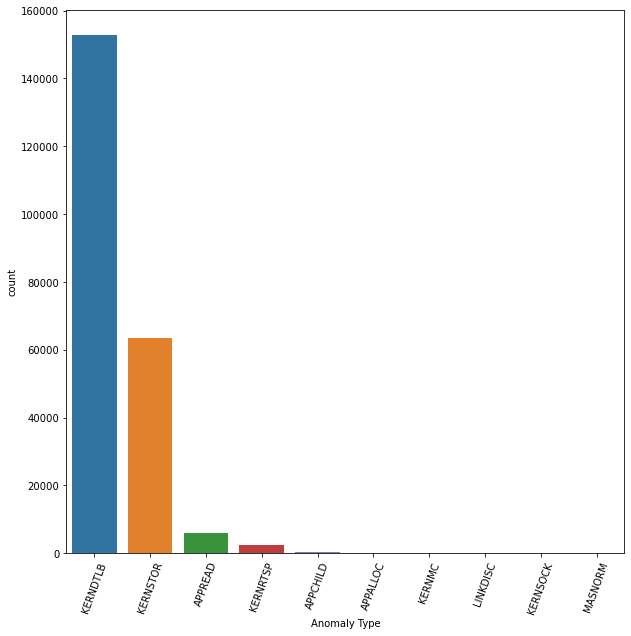

In [20]:
df_200506_unique_anomaly_type = df_200506['Anomaly Type'].unique()
print(df_200506_unique_anomaly_type)
print(len(df_200506_unique_anomaly_type))
print(df_200506['Anomaly Type'].value_counts())

df_200506_with_anomaly = df_200506[df_200506['Anomaly Type'] != '-']
fig, ax = plt.subplots(figsize=(10, 10))
df_200506_anomaly_types = df_200506_with_anomaly['Anomaly Type'].value_counts().index
op = sns.countplot(x='Anomaly Type', data=df_200506_with_anomaly, order=df_200506_anomaly_types)
op.set_xticklabels(labels = df_200506_anomaly_types, rotation = 70)
plt.show()

['KERNEL' 'LINKCARD' 'APP' 'MMCS' 'HARDWARE' 'DISCOVERY' 'CMCS'
 'BGLMASTER' 'FATAL']
KERNEL       1141262
APP            12257
DISCOVERY       7290
LINKCARD         227
HARDWARE          69
MMCS              18
FATAL             13
CMCS              12
BGLMASTER          3
Name: Component, dtype: int64


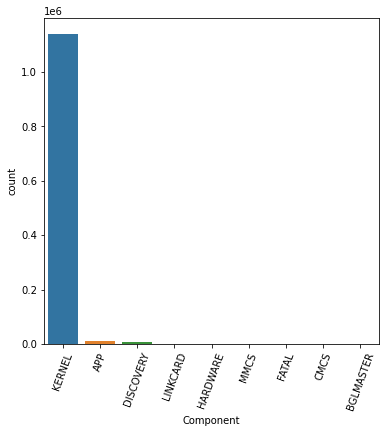

In [21]:
df_200506_unique_components = df_200506['Component'].unique()
print(df_200506_unique_components)
print(df_200506['Component'].value_counts())

df_200506_component_types = df_200506['Component'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Component', data=df_200506, order=df_200506_component_types)
op.set_xticklabels(labels = df_200506_component_types, rotation = 70)
plt.show()

['INFO' 'FATAL' 'WARNING' 'SEVERE' 'ERROR' 'Kill' 'FAILURE']
INFO       607108
FATAL      546676
WARNING      2568
SEVERE       2434
ERROR        2351
Kill           13
FAILURE         1
Name: Level, dtype: int64


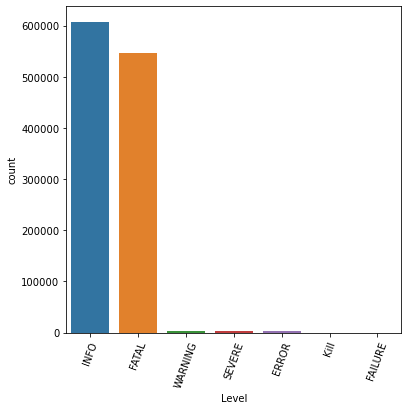

In [22]:
df_200506_unique_levels = df_200506['Level'].unique()
print(df_200506_unique_levels)
print(df_200506['Level'].value_counts())

df_200506_log_levels = df_200506['Level'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Level', data=df_200506, order=df_200506_log_levels)
op.set_xticklabels(labels=df_200506_log_levels, rotation=70)
plt.show()

           Component  Anomaly Label
KERNEL       1141262         218581
APP            12257           6383
DISCOVERY       7290              0
LINKCARD         227             12
HARDWARE          69              0
MMCS              18              0
FATAL             13              0
CMCS              12              0
BGLMASTER          3              1


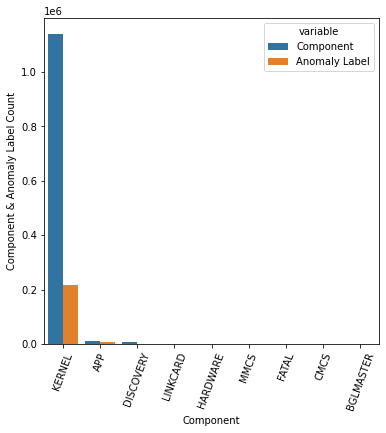

In [76]:
df_200506_anomalies_by_component = df_200506.groupby('Component').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
df_200506_anomalies_with_component = pd.concat((df_200506['Component'].value_counts(), df_200506_anomalies_by_component), axis=1)
print(df_200506_anomalies_with_component)
component_plot_df = pd.melt(df_200506_anomalies_with_component.reset_index(), id_vars='index')

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x='index', y='value', hue='variable', data=component_plot_df)
op.set_xticklabels(labels=component_plot_df['index'].unique(), rotation=70)
op.set(xlabel='Component', ylabel='Component & Anomaly Label Count')
plt.show()

          Level  Anomaly Label
INFO     607108              0
FATAL    546676         224976
WARNING    2568              0
SEVERE     2434              0
ERROR      2351              0
Kill         13              0
FAILURE       1              1


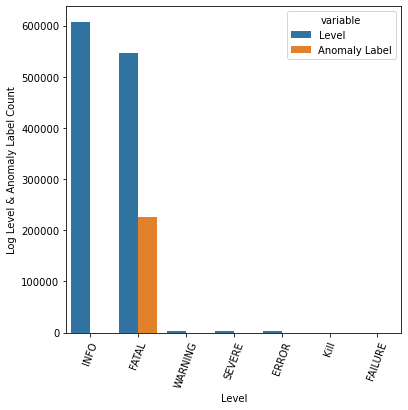

In [77]:
df_200506_anomalies_by_level = df_200506.groupby('Level').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
df_200506_anomalies_with_level = pd.concat((df_200506['Level'].value_counts(), df_200506_anomalies_by_level), axis=1)
print(df_200506_anomalies_with_level)
level_plot_df = pd.melt(df_200506_anomalies_with_level.reset_index(), id_vars='index')

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x='index', y='value', hue='variable', data=level_plot_df)
op.set_xticklabels(labels=level_plot_df['index'].unique(), rotation=70)
op.set(xlabel='Level', ylabel='Log Level & Anomaly Label Count')
plt.show()

In [86]:
log_csv_file_name = 'bgl_200506.csv'
log_csv_file = path.abspath(path.join(project_root, input_dir, log_csv_file_name))
bucket_name = 'sagemaker-studio-326787221562-jycpwz9gs3f'
key = 'BGL_200506.csv'

client = boto3.client("s3")
df_200506.to_csv(log_csv_file)

client.upload_file(log_csv_file, bucket_name, key)